In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [370]:
# Load dataset 
data = pd.read_csv('Advertising.csv')

In [372]:
# Clean and split dataset
X = data[['TV', 'Radio', 'Newspaper']] # features/predictors 
y = data['Sales'] # response y

# Display results 
print("Predictors (X):")
print(X.head())
print("\nResponse (y):")
print(y.head())

Predictors (X):
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Response (y):
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [374]:
# Save the mean and standard deviation for reverting later
x_means = X.mean()
x_stds = X.std()

In [376]:
# Standardize the data
X_scaled = (X - x_means) / x_stds

In [378]:
# Add column to all ones to X
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]  

In [380]:
# Divide dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Display the shapes of the divided datasets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the split datasets:
X_train shape: (170, 4)
X_test shape: (30, 4)
y_train shape: (170,)
y_test shape: (30,)


In [382]:
# Initialize weights
n_features = X_train.shape[1]
weights = initialize_weights(n_features)

In [384]:
# Fitting the model: Gradient Descent Functions
def initialize_weights(n):
    np.random.seed(2)
    return np.random.rand(n)

def predict(X, weights):
    return np.dot(X, weights)

def compute_cost(X, y, weights):
    predictions = predict(X, weights)
    return np.mean((predictions - y) ** 2) / 2

def compute_gradient(X, y, weights):
    predictions = predict(X, weights)
    return np.dot(X.T, predictions - y) / len(y)

def update_weights(weights, gradients, learning_rate):
    return weights - learning_rate * gradients

def grad_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        gradients = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    return weights, cost_history

In [386]:
# Display initialized weights
print("Initialized Weights:")
print(weights)

Initialized Weights:
[0.4359949  0.02592623 0.54966248 0.43532239]


In [388]:
# Set hyperparameters
learning_rate = 0.01
iterations = 1000

In [390]:
# Predict on train and test set (standardized data)
y_train_pred_scaled = predict(X_train, optimal_weights)
y_test_pred_scaled = predict(X_test, optimal_weights)

In [392]:
# Display the predictions for the train set 
print("Train Set Predictions :")
print(y_train_pred[:10])  # Predict first 10 

# Display the predictions for the test set
print("\nTest Set Predictions :")
print(y_test_pred[:10])

Train Set Predictions :
[12.48969722 10.0043381  21.29542515 12.0928736  18.25688184 20.16414829
 14.04788189 20.7877763  11.05175206  4.57955295]

Test Set Predictions :
[16.34247487 20.81208074 21.52026725 10.53951786 22.12758394 13.0298169
 21.03236132  7.46843628 13.64575128 15.13863574]


In [394]:
# Perform Gradient Descent
optimal_weights, cost_history = grad_descent(X_train, y_train, weights, learning_rate, iterations)

# Display the optimal weights
print("Optimal Weights:")
print(optimal_weights)

# Display the cost history 
print("\nCost History :")
print(cost_history[:10]) # Show 10 results 

Optimal Weights:
[14.02424804  3.84745796  2.79514848  0.01976602]

Cost History :
[102.7628207894046, 100.71526270713781, 98.7091620499613, 96.74367767231077, 94.81798552936073, 92.93127832861322, 91.08276518860265, 89.27167130457079, 87.49723762096903, 85.7587205106486]


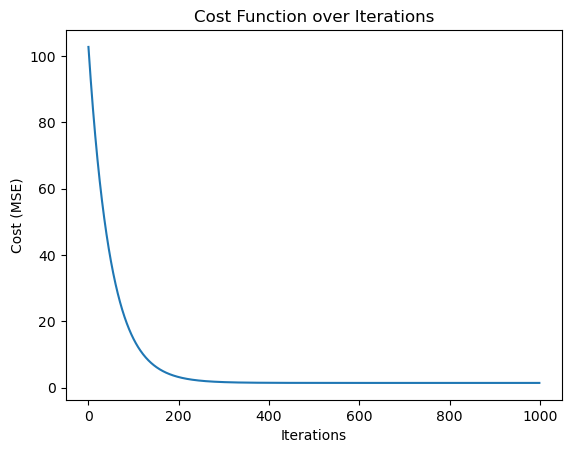

In [396]:
# Plot the cost function over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function over Iterations')
plt.show()

In [398]:
# Predict quantitaive response y on train set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train MSE: {mse_train}, R2: {r2_train}")


Train MSE: 2.780972415823747, R2: 0.893678893793465


In [400]:
# Predict quantitaive response y on test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}, R2: {r2_test}")

Test MSE: 2.855079494330034, R2: 0.9109968235844046


In [402]:
# Revert the scaled feature data of X_train and X_test back to original form
def revert_features(scaled_data, means, stds):
    return (scaled_data[:, 1:] * stds.values) + means.values

In [404]:
# Revert X_train and X_test back to original scale (without bias column)
X_train_reverted = revert_features(X_train, x_means, x_stds)
X_test_reverted = revert_features(X_test, x_means, x_stds)

In [406]:
# Display reverted X_train and X_test data
print("\nReverted X_train (first 5 rows):")
print(pd.DataFrame(X_train_reverted, columns=['TV', 'Radio', 'Newspaper']).head())

print("\nReverted X_test (first 5 rows):")
print(pd.DataFrame(X_test_reverted, columns=['TV', 'Radio', 'Newspaper']).head())


Reverted X_train (first 5 rows):
      TV  Radio  Newspaper
0  199.8    2.6       21.2
1   69.2   20.5       18.3
2  198.9   49.4       60.0
3   16.9   43.7       89.4
4  280.7   13.9       37.0

Reverted X_test (first 5 rows):
      TV  Radio  Newspaper
0  163.3   31.6       52.9
1  195.4   47.7       52.9
2  292.9   28.3       43.2
3   11.7   36.9       45.2
4  220.3   49.0        3.2


In [408]:
# Revert predictions back to original scale (y is already in original scale so no need to revert y)
y_train_pred = y_train_pred_scaled  # y_train was not standardized
y_test_pred = y_test_pred_scaled

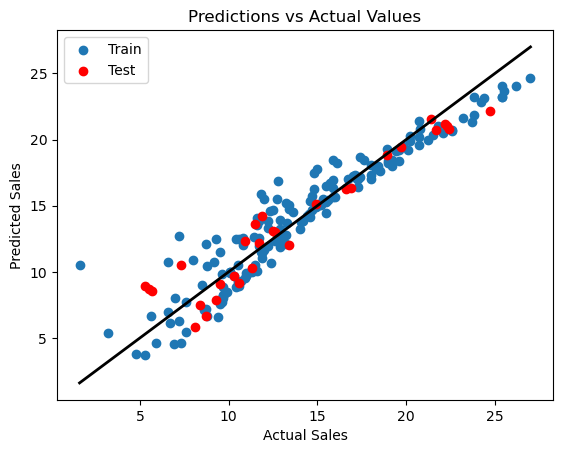

In [410]:
# Scatter plot of predictions vs actual values
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test', color='red')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.title('Predictions vs Actual Values')
plt.show()

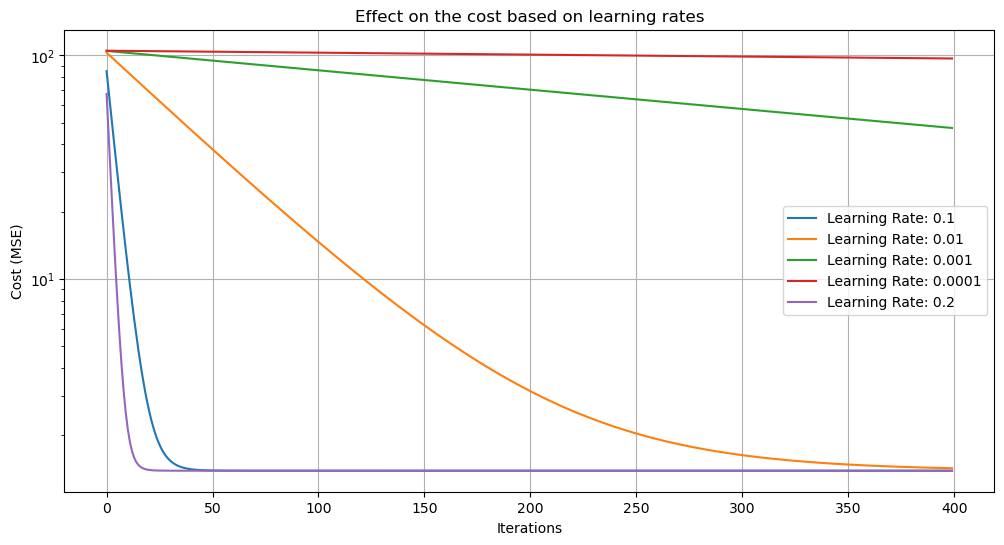

In [412]:
# Different learning rates to optimal iterations 
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
iterations = 400

# Plot
plt.figure(figsize=(12, 6))

# Gradient Descent for each learning rate
for lr in learning_rates:
    weights = initialize_weights(n_features)  
    _, cost_history = grad_descent(X_train, y_train, weights, lr, iterations)
    plt.plot(range(iterations), cost_history, label=f'Learning Rate: {lr}')

# Plot
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Effect on the cost based on learning rates')
plt.legend()
plt.grid()
plt.yscale('log')  
plt.show()

In [413]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression()
ols_model.fit(X_train[:, 1:], y_train)  # Skip the bias term
y_ols_train_pred = ols_model.predict(X_train[:, 1:])
y_ols_test_pred = ols_model.predict(X_test[:, 1:])

mse_ols_train = mean_squared_error(y_train, y_ols_train_pred)
mse_ols_test = mean_squared_error(y_test, y_ols_test_pred)
r2_ols_train = r2_score(y_train, y_ols_train_pred)
r2_ols_test = r2_score(y_test, y_ols_test_pred)

print(f"OLS Train MSE: {mse_ols_train}, R2: {r2_ols_train}")
print(f"OLS Test MSE: {mse_ols_test}, R2: {r2_ols_test}")

OLS Train MSE: 2.780960261859515, R2: 0.8936793584593188
OLS Test MSE: 2.8540931918021224, R2: 0.9110275702091712
